# Appendix A.3 - MatPlotLib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

First we need to import the matplotlib library.

In [2]:
import matplotlib

Matplotlib can output graphs using various backend graphics libraries, such as Tk, wxPython, etc.  When running python using the command line, the graphs are typically shown in a separate window. 

There is some confusion around the relationship between **pylab**, **pyplot** and **matplotlib**. It's simple: matplotlib is the full library, it contains everything including pylab and pyplot. Pyplot provides a number of tools to plot graphs, including the state-machine interface to the underlying object-oriented plotting library. Pylab is a convenience module that imports matplotlib.pyplot and NumPy in a single name space. You will find many examples using pylab, but it is no longer recommended.

## First graph
Now let's plot our first graph.  In its simplest use, pyplot maintains an internal state in which you build up a visualization step by step. Once you’re done, you can save it with **savefig** or display it with **show()**.

If the plot function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate. You can also provide two arrays: one for the horizontal axis x, and the second for the vertical axis y.

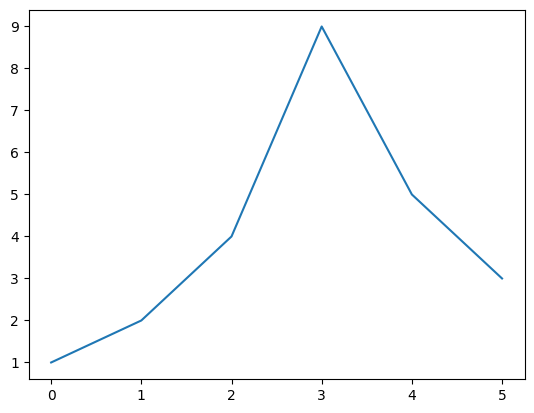

In [3]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

The axes automatically match the extent of the data.  We would like to give the graph a bit more room, so let's call the **axis()** function to change the extent of each axis **[xmin, xmax, ymin, ymax]**

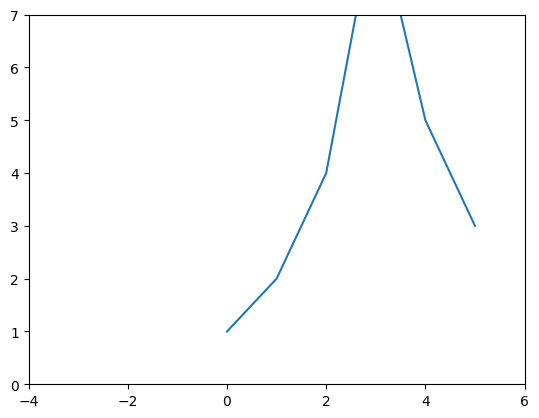

In [4]:
plt.plot([1, 2, 4, 9, 5, 3])
plt.axis([-4, 6, 0, 7])
plt.show()

Now, let's plot a mathematical function

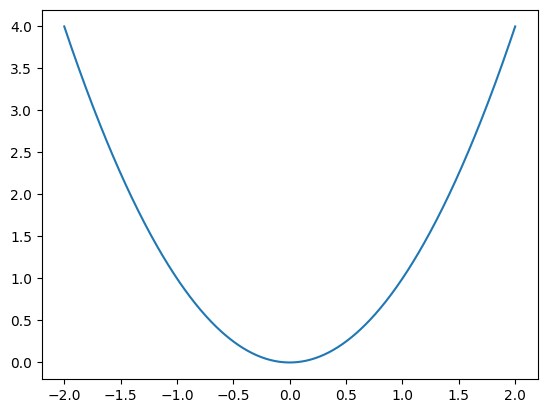

In [5]:
import numpy as np

x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

We ca add a **title**, and x and y **labels**, and draw a **grid**

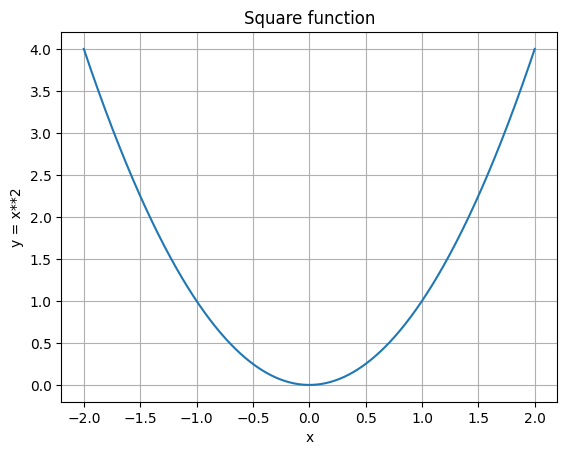

In [6]:
plt.plot(x, y)
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show()

## Line style and color

You can pass a 3rd argument to change the line's **style** and **color**.
The full list of styles and colors can be found [here](https://matplotlib.org/2.0.2/api/pyplot_api.html)

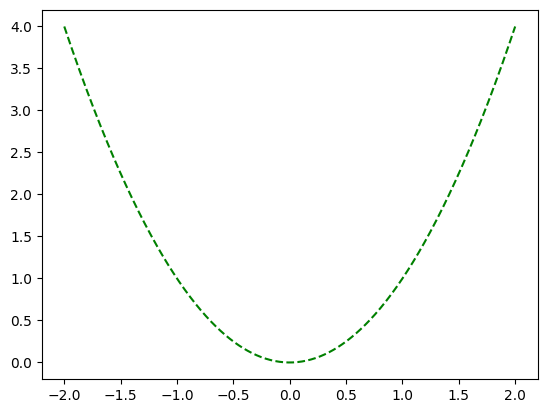

In [7]:
plt.plot(x, y,"g--")
plt.show()

We can plot multiple lines on one graph, just passing x1, y1, [style1], x2, y2, [style2], ...

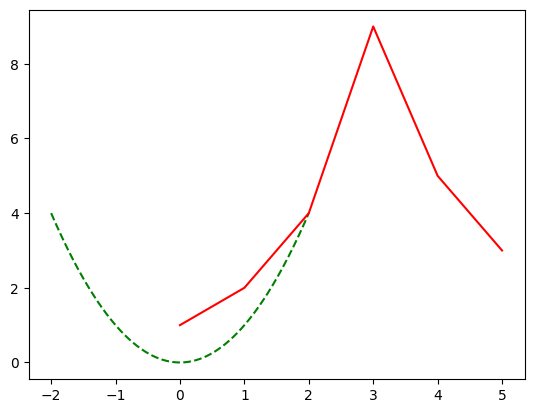

In [8]:
plt.plot(x, y,"g--", [1, 2, 4, 9, 5, 3], "r-")
plt.show()

Or calling plot multiple times before calling show, and we can also draw simple points instead of lines or set extra attributes on these lines, such as the line width, the dash style or the alpha level.

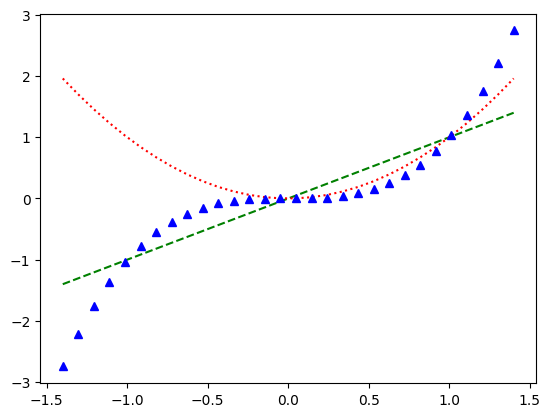

In [9]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--') 
plt.plot(x, x**2, 'r:') 
plt.plot(x, x**3, 'b^')
plt.show()

## Saving a figure
Saving a figure to disk is as simple as calling **savefig()** with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

mkdir: data: File exists


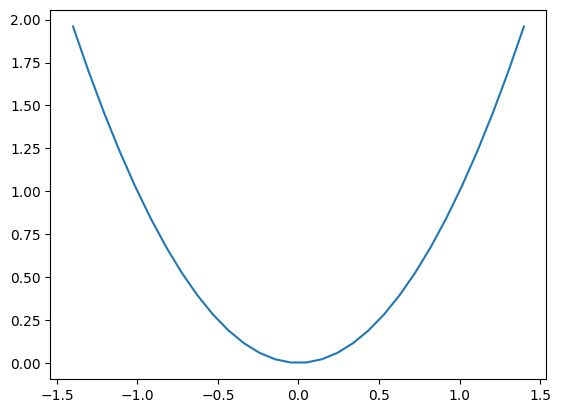

In [10]:
!mkdir data
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("data/my_square_function.png", transparent=True)

## Subplots
A matplotlib figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the **subplot()** function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot, so when you call the plot() function, it draws on the active subplot

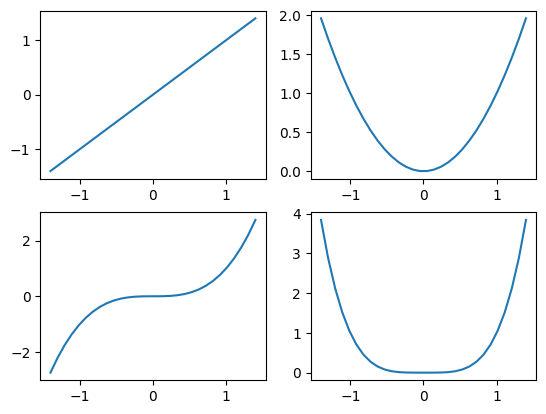

In [11]:
x = np.linspace(-1.4, 1.4, 30)

plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show()

It is easy to create subplots that span across multiple grid cells like so:

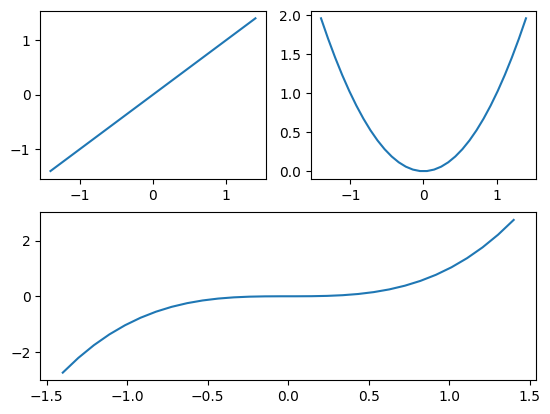

In [12]:
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show()

If we need more complex subplot positionning, you can use **subplot2grid()** instead of subplot. We can specify the number of rows and columns in the grid, then our subplots positions in that grid (top-left = (0,0)), and optionally how many rows and/or columns it spans

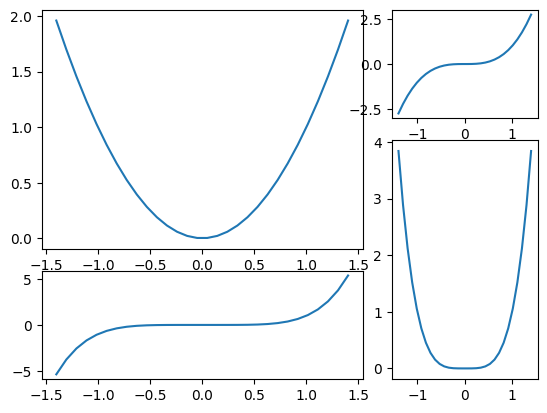

In [13]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

## Multiple figures
It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates **figure(1)** automatically. When you switch figure, pyplot keeps track of the currently active figure

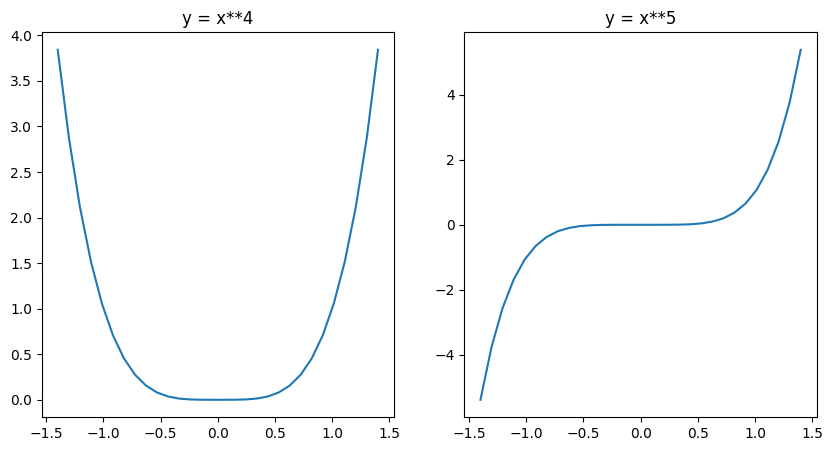

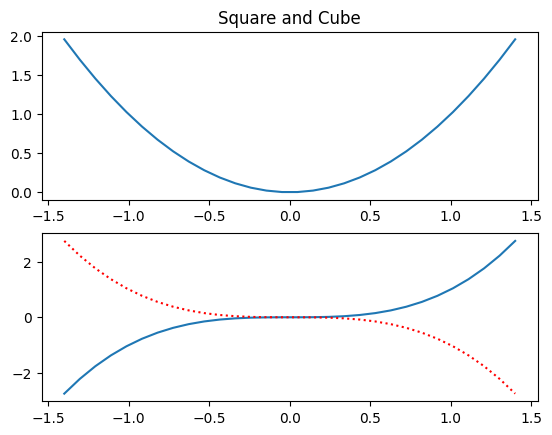

In [14]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, "r:")

plt.show()

So far we have used Pyplot's **state machine** which keeps track of the currently active subplot. Every time you call the plot function, pyplot just draws on the currently active subplot. It also does some more magic, such as automatically creating a figure and a subplot when you call plot, if they don't exist yet. This magic is convenient in an interactive environment (such as Jupyter). But when you are writing a program, **explicit is better than implicit** ([The Zen of Python](https://en.wikipedia.org/wiki/Zen_of_Python))

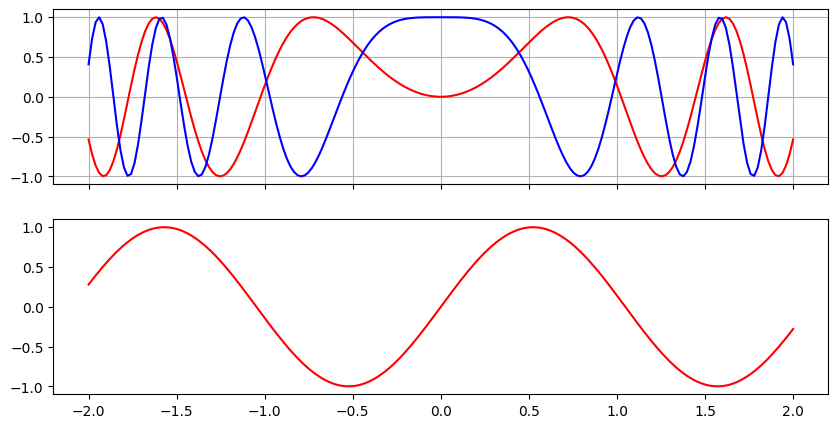

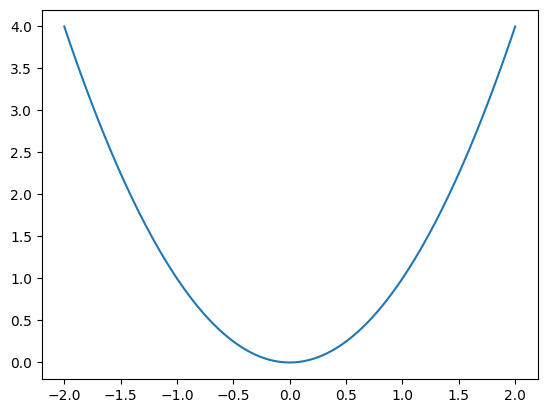

In [15]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)

fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
plt.show()

## Drawing text
We can call **text()** to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes.  Any text in matplotlib may contain TeX equation expressions. For more text properties, visit [the documentation](http://matplotlib.org/users/text_props.html#text-properties).

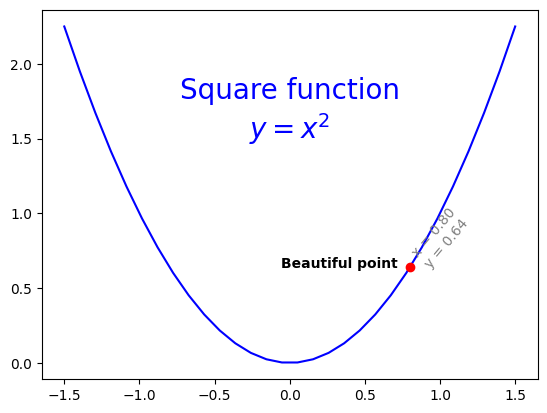

In [16]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue', horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show()

It is quite frequent to annotate elements of a graph, such as the beautiful point above. The **annotate()** function makes this easy: just indicate the location of the point of interest, and the position of the text, plus optionally some extra attributes for the text and the arrow.

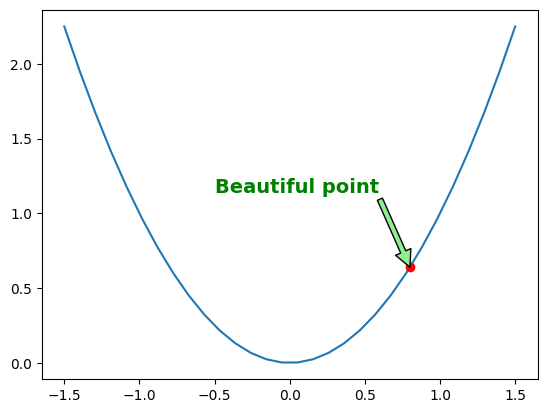

In [17]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.3,py+0.5),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.show()

You can also add a bounding box around your text by using the **bbox** attribute:

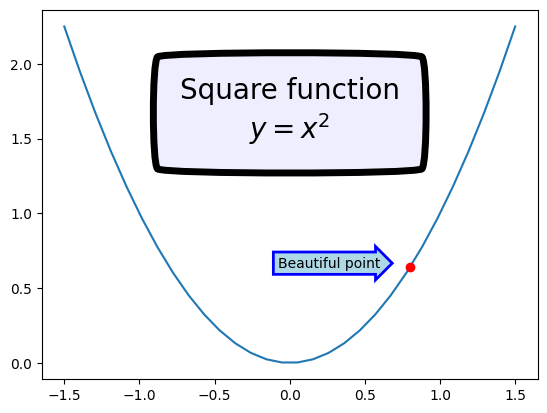

In [18]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

plt.show()

## Legends
The simplest way to add a legend is to set a label on all lines, then just call the **legend()** function.

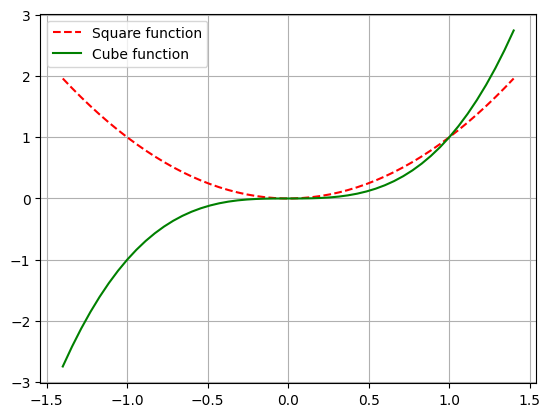

In [19]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Non linear scales
Matplotlib supports non linear scales, such as logarithmic

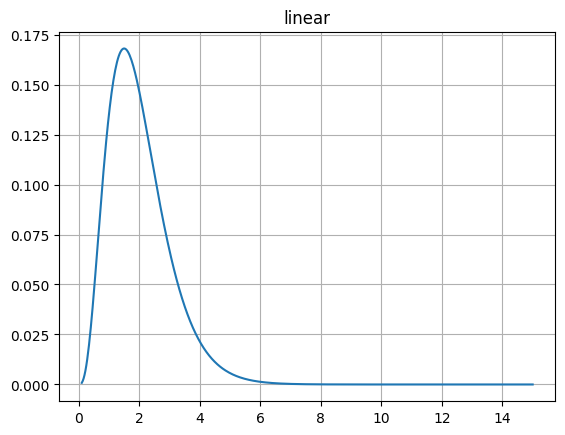

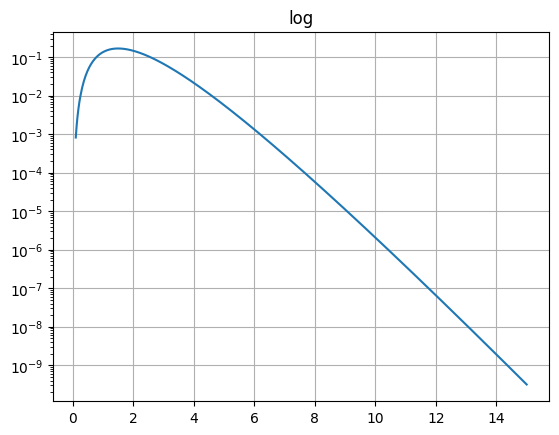

In [20]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

plt.show()

## Ticks and tickers
The axes have **ticks** (the locations of little marks), **tick lines** (small lines drawn at those locations), **tick labels** (drawn next to the tick lines), and **tickers** (objects that are capable of deciding where to place ticks). The default tickers typically do a pretty good job, but sometimes you need more control. Fortunately, matplotlib gives you full control over ticks.

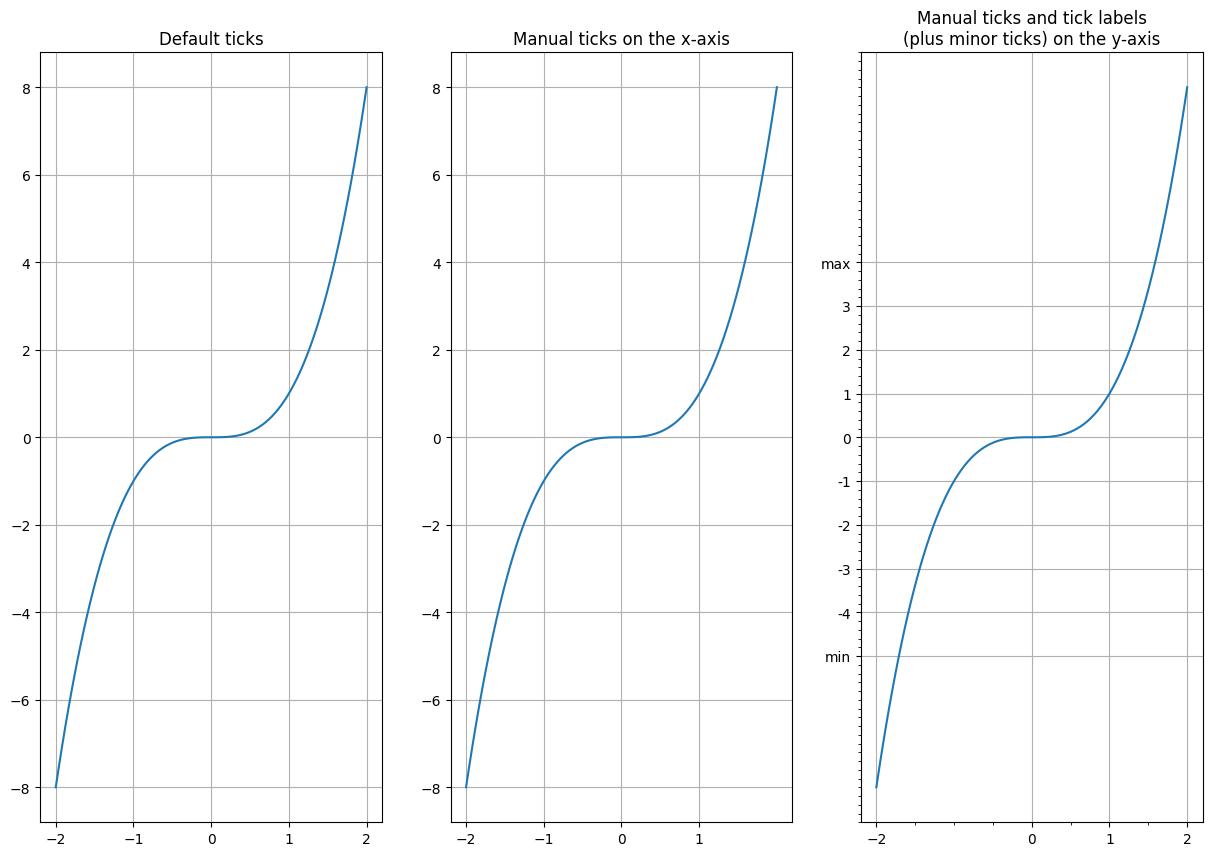

In [21]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("Default ticks")

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom='off')
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")


plt.grid(True)

plt.show()

## 3D projection
Plotting 3D graphs is quite straightforward. You need to import **Axes3D**, which registers the 3d projection. Then create a subplot setting the projection to 3d. This returns an **Axes3DSubplot** object, which you can use to call **plot_surface**, giving x, y, and z coordinates, plus optional attributes.

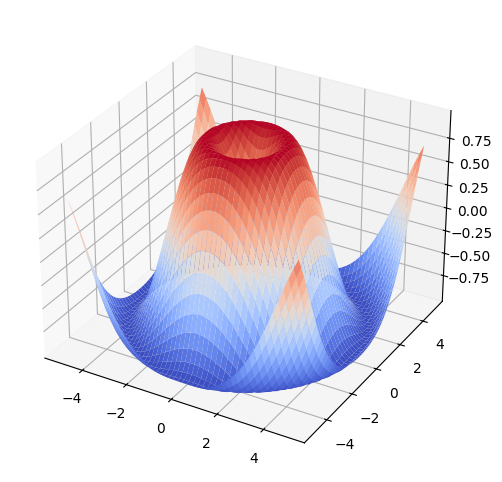

In [22]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (14, 6))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

Another way to display this same data is via a **contour plot**

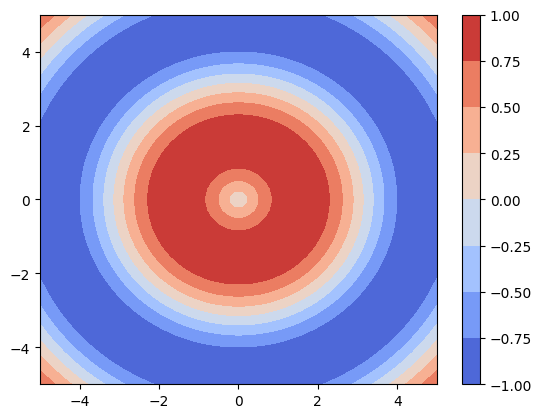

In [23]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

## Scatter plot
To draw a scatter plot, simply provide the x and y coordinates of the points.

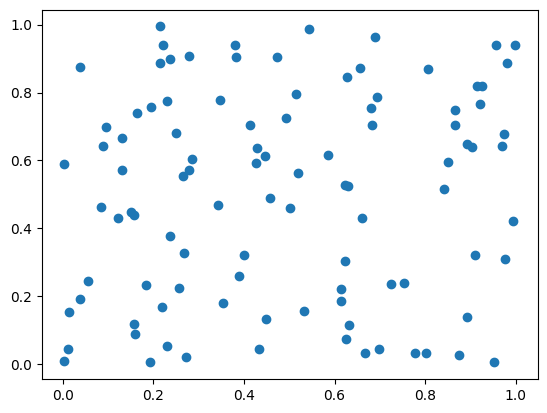

In [24]:
from numpy.random import rand
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

You may also optionally provide the scale of each point.

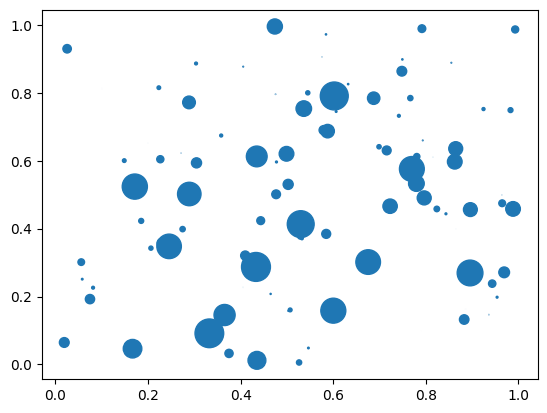

In [25]:
x, y, scale = rand(3, 100)
scale = 500 * scale ** 5
plt.scatter(x, y, s=scale)
plt.show()

And as usual there are a number of other attributes you can set, such as the fill and edge colors and the alpha level.

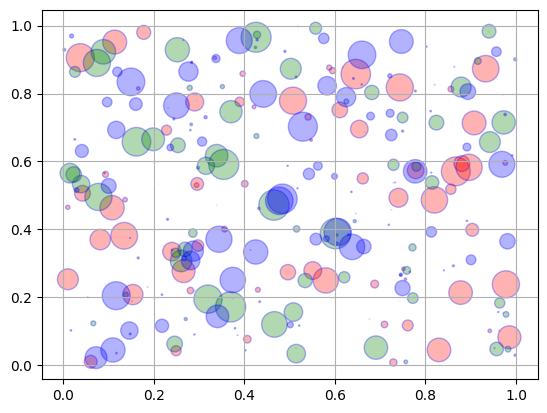

In [26]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()

## Lines
You can draw lines simply using the plot function, as we have done so far. However, it is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept

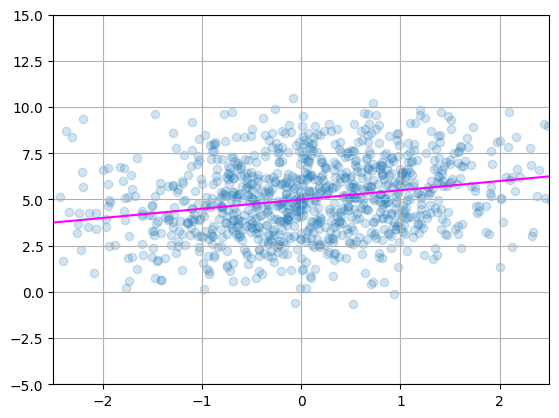

In [27]:
from numpy.random import randn

def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

x = randn(1000)
y = 0.5*x + 5 + randn(1000)*2

plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)
plt.show()

## Histograms

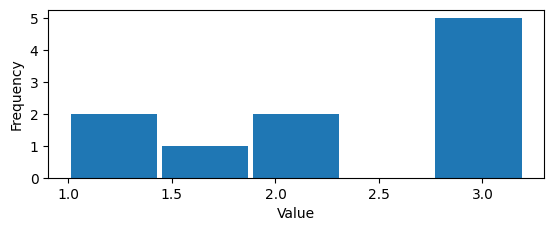

In [28]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]

plt.subplot(212)
plt.hist(data, bins=5, rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

## Images
Reading, generating and plotting images in matplotlib is quite straightforward

To read an image, just import the **matplotlib.image** module, and call its **imread()** function, passing it the file name. This returns the image data, as a NumPy array. Now all we need to do is to call **imshow**

(480, 640, 4) float32


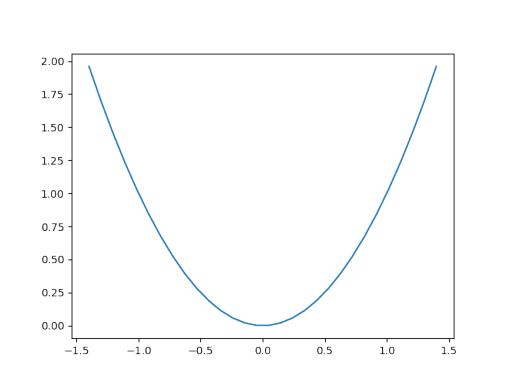

In [29]:
import matplotlib.image as mpimg

img = mpimg.imread('data/my_square_function.png')
print(img.shape, img.dtype)

plt.imshow(img)
plt.axis('off')
plt.show()

It's just as easy to generate your own image:

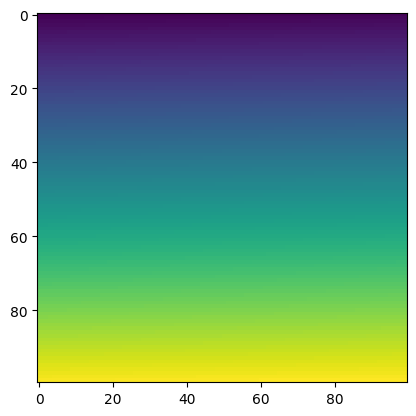

In [30]:
img = np.arange(100*100).reshape(100, 100)
plt.imshow(img)
plt.show()

As we did not provide RGB levels, the imshow function automatically maps values to a color gradient. By default, the color gradient goes from blue (for low values) to red (for high values), but you can select another color map.  For example:

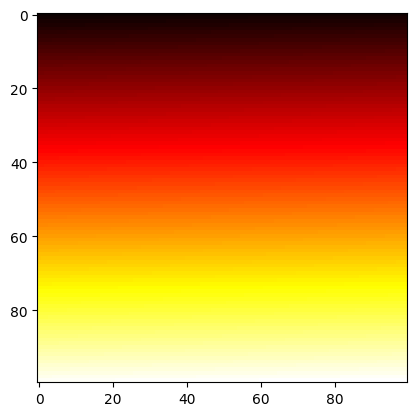

In [31]:
plt.imshow(img, cmap="hot")
plt.show()

## Animations

The animation tools center around the matplotlib.animation.Animation base class, which provides a framework around which the animation functionality is built. The main interfacee is FuncAnimation. Let's step through this and see what's going on.


First we create the function init()  which will be called to create the base frame upon which the animation takes place. Here we use just a simple function which sets the line data to nothing. It is important that this function return the line object, because this tells the animator which objects on the plot to update after each frame:

In [32]:
def init():
    line.set_data([], [])
    return line,

The next piece is the animation function. It takes a single parameter, the frame number i, and draws a sine wave with a shift that depends on i:

In [46]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,


Note that again here we return a tuple of the plot objects which have been modified. This tells the animation framework what parts of the plot should be animated.

Finally, we create Here we create a figure window, a single axis in the figure, a line object which will be modified in the animation and the animation object

In [47]:
from matplotlib import animation

import matplotlib as mpl
mpl.rc('animation', html='jshtml')

fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=100, interval=20, blit=True)
    
plt.close()

This object needs to persist, so it must be assigned to a variable. We've chosen a 100 frame animation with a 20ms delay between frames. The blit keyword is an important one: this tells the animation to only re-draw the pieces of the plot which have changed. The time saved with blit=True means that the animations display much more quickly.

In [48]:
anim